In [21]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

from scipy import stats
import math

from sklearn import preprocessing

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV 

# 随机森林

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV


In [7]:
data_attach_notnull = pd.read_excel('dataOtherFactors__attach_notnul_17.11.11.xlsx')
data_attach_notnull.drop(['所辖乡镇','星期','涉外事故','现场','行政区划','现场','公里数'],axis=1,inplace=True)

#生成训练集和测试集


data_attach_notnull['index'] = range(len(data_attach_notnull))
data_attach_notnull_test = data_attach_notnull.sample(frac=0.2,replace=False)
#获取训练集
index = ~data_attach_notnull.index.isin(data_attach_notnull_test['index'])
data_attach_notnull_train = data_attach_notnull[index]


#转换为数字
data_attach_notnull.drop(['index'],axis=1,inplace=True)
data_attach_notnull_train.drop(['index'],axis=1,inplace=True)
data_attach_notnull_test.drop(['index'],axis=1,inplace=True)
columnsToNum = list(data_attach_notnull_train.columns)

set_toNum = pd.DataFrame()
for i in columnsToNum:
    set_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull[i])


trainSet_toNum = pd.DataFrame()
for i in columnsToNum:
    trainSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull_train[i])

# columnsToNum = list(data_attach_notnull_test.columns)
testSet_toNum = pd.DataFrame()
for i in columnsToNum:
    testSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull_test[i])

del data_attach_notnull_train,data_attach_notnull_test

#统一训练集、测试集格式
train_features = trainSet_toNum.drop(['事故类型'],axis=1).columns

x_all =np.array(set_toNum.drop(['事故类型'],axis=1)) 
y_all = np.array(set_toNum['事故类型'])
y = np.zeros((len(y_all),len(set_toNum.groupby('事故类型')) ))
for i in range(len(y_all)):
    y[i][y_all[i]] = 1
y_all = np.mat(y)
x_all = np.mat(x_all)
# y_all = np.mat(y_all)

x_train =np.array(trainSet_toNum.drop(['事故类型'],axis=1)) 
y_train = np.array(trainSet_toNum['事故类型'])
y = np.zeros((len(y_train),len(trainSet_toNum.groupby('事故类型')) ))
for i in range(len(y_train)):
    y[i][y_train[i]] = 1
y_train = np.mat(y)
x_train = np.mat(x_train)
# y_train = np.mat(y_train)


x_test =np.array(testSet_toNum.drop(['事故类型'],axis=1)) 
y_test = np.array(testSet_toNum['事故类型'])
y = np.zeros((len(y_test),len(testSet_toNum.groupby('事故类型')) ))
for i in range(len(y_test)):
    y[i][y_test[i]] = 1
y_test = np.mat(y)
x_test = np.mat(x_test)
# y_test = np.mat(y_test)


del y,trainSet_toNum,testSet_toNum

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
forest = RandomForestClassifier(max_features='sqrt',random_state=10,oob_score=True)
forest.fit(x_all,y_all)
print(forest.oob_score_)

0.79797979798


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


 1) 交通信号方式（控制）                     0.125892
 2) 路侧防护设施类型                       0.102299
 3) 道路物理隔离                         0.095057
 4) 道路类型                           0.082697
 5) 路面附着系数                         0.081897
 6) 能见度                            0.070655
 7) 是否节假日                          0.054460
 8) 照明条件                           0.050941
 9) 路面结构                           0.044041
10) 路口路段类型                         0.042547
11) 中央隔离设施                         0.040577
12) 路表情况                           0.032869
13) 是否白天                           0.029379
14) 在道路横断面位置                       0.026795
15) 公路行政等级                         0.024954
16) 天气                             0.023048
17) 交通标志标线完善                       0.020723
18) 地形                             0.020702
19) 道路线型                           0.012109
20) 路面状况                           0.008822
21) 长下坡路段                          0.003757
22) 道路安全隐患督办等级                     0.002328
23) 事故多发点段                      

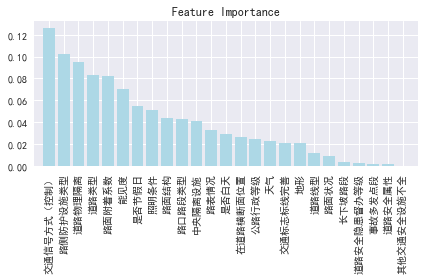

In [11]:
importances = forest.feature_importances_
indice = np.argsort(importances)[::-1]#按照索引对应值的大小对索引排序
for i in range(x_train.shape[1]):
    print('%2d) %-*s %f'%(i+1, 30, train_features[indice[i]], importances[indice[i]]))
    
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]),
       importances[indice],
       color='lightblue',
       align='center')
plt.xticks(range(x_train.shape[1]),
          train_features[indice],
           rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.tight_layout()
plt.show()

In [12]:
data = pd.read_excel('data_accidentForPapaer_17.11.13.xlsx')
data = data[data['路面附着系数'].isnull()]
print(len(data))
data_roadGrade_withoutJianyi = data[~data['事故类型'].isin(['简易程序事故'])]
print(len(data_roadGrade_withoutJianyi))

data_roadGrade_withoutJianyi.drop(['路面附着系数'],axis=1,inplace=True)
data_roadGrade_withoutJianyi \
                        = data_roadGrade_withoutJianyi[data_roadGrade_withoutJianyi['是否节假日'].notnull()\
                        &data_roadGrade_withoutJianyi['事故多发点段'].notnull()\
                        &data_roadGrade_withoutJianyi['交通信号方式（控制）'].notnull()\
                        &data_roadGrade_withoutJianyi['公里数'].notnull()\
                        &data_roadGrade_withoutJianyi['其他交通安全设施不全'].notnull()\
                        &data_roadGrade_withoutJianyi['在道路横断面位置'].notnull()\
                        &data_roadGrade_withoutJianyi['地形'].notnull()\
                        &data_roadGrade_withoutJianyi['所辖乡镇'].notnull()\
                        &data_roadGrade_withoutJianyi['照明条件'].notnull()\
                        &data_roadGrade_withoutJianyi['能见度'].notnull()\
                        &data_roadGrade_withoutJianyi['路侧防护设施类型'].notnull()\
                        &data_roadGrade_withoutJianyi['路口路段类型'].notnull()\
                        &data_roadGrade_withoutJianyi['路表情况'].notnull()\
                        &data_roadGrade_withoutJianyi['路面状况'].notnull()\
                        &data_roadGrade_withoutJianyi['路面结构'].notnull()\
                        &data_roadGrade_withoutJianyi['道路安全属性'].notnull()\
                        &data_roadGrade_withoutJianyi['道路安全隐患督办等级'].notnull()\
                        &data_roadGrade_withoutJianyi['道路物理隔离'].notnull()\
                        &data_roadGrade_withoutJianyi['道路类型'].notnull()\
                        &data_roadGrade_withoutJianyi['道路线型'].notnull()]

#整合路宽
data_way = data_roadGrade_withoutJianyi[['单向路宽','双向路宽']]
data_way.columns=['oneWay','twoWay']

#填充空值为-1
data_way.fillna(-1,inplace=True)

def isTwowayRoad(row,oneWay,twoWay):
    if row[oneWay] == -1 and row[twoWay] == -1:
        return np.nan
    elif row[oneWay] == -1:
        return '是'
    elif  row[twoWay] == -1:
        return  '否'

def getRoadWidth(row,oneWay,twoWay):
    if row[oneWay] == -1 and row[twoWay] == -1:
        return np.nan
    elif row[oneWay] == -1:
        return row[twoWay]
    elif  row[twoWay] == -1:
        return  row[oneWay]

data_isTwoWay = pd.DataFrame(data_way.apply(isTwowayRoad, axis=1, oneWay='oneWay', twoWay='twoWay'),\
                             columns=['isTwoWay'])
data_roadWidth = pd.DataFrame(data_way.apply(getRoadWidth, axis=1, oneWay='oneWay', twoWay='twoWay'),\
                             columns=['roadWidth'])

data_roadGrade_withoutJianyi.insert(value=data_isTwoWay,column='是否双道',loc=3)
data_roadGrade_withoutJianyi.insert(value=data_roadWidth,column='路宽',loc=4)

# pd.DataFrame(data_attach_notnull[(data_attach_notnull['路宽']==-1)])[['是否双道','路宽','单向路宽','双向路宽']]
data_roadGrade_withoutJianyi.drop(['单向路宽','双向路宽'],axis=1,inplace=True)
del data_way,data_isTwoWay,data_roadWidth
       
data_roadGrade_withoutJianyi = data_roadGrade_withoutJianyi[data_roadGrade_withoutJianyi['是否双道'].notnull()\
                                                        &data_roadGrade_withoutJianyi['中央隔离设施'].notnull()]
data_roadGrade_withoutJianyi.drop(['公路行政等级'],axis=1,inplace=True)

nan_columns = {}
length_data = len(data_roadGrade_withoutJianyi)
for i in range(len(data_roadGrade_withoutJianyi.columns)): 
    odds = sum(data_roadGrade_withoutJianyi[data_roadGrade_withoutJianyi.columns[i]].isnull())/length_data
    nan_columns[data_roadGrade_withoutJianyi.columns[i]] = odds

j = 0
for i in nan_columns:
    print(i+': '+str(nan_columns[i]),end='  ')
    j+=1
    if j==4:
        j=0
        print()
print('数据长度：%s'%len(data_roadGrade_withoutJianyi))

196169
3052


D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


中央隔离设施: 0.240349599417  是否节假日: 0.0  是否白天: 0.0  是否双道: 0.28987618354  
路宽: 0.28987618354  事故地点: 0.0  事故多发点段: 0.0  事故类型: 0.0  
交通信号方式（控制）: 0.0  交通标志标线完善: 0.0  公路行政等级: 0.402039329934  公里数: 0.0  
其他交通安全设施不全: 0.0  在道路横断面位置: 0.0  地形: 0.0  天气: 0.0  
所辖乡镇: 0.0  星期: 0.0  是否运载危险物品: 0.0  照明条件: 0.0  
能见度: 0.0  行政区划: 0.0  路侧防护设施类型: 0.0  路口路段类型: 0.0  
路号: 0.0  路表情况: 0.0  路面状况: 0.0  路面结构: 0.0  
道路安全属性: 0.0  道路安全隐患督办等级: 0.0  道路物理隔离: 0.0  道路类型: 0.0  
道路线型: 0.0  长下坡路段: 0.0  774


In [17]:
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==345,'交通信号方式（控制）']='方式1'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==45,'交通信号方式（控制）']='方式2'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==456,'交通信号方式（控制）']='方式3'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==3456,'交通信号方式（控制）']='方式4'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==16,'交通信号方式（控制）']='方式5'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==34,'交通信号方式（控制）']='方式6'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==56,'交通信号方式（控制）']='方式7'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==356,'交通信号方式（控制）']='方式8'

In [18]:
data_roadGrade_withoutJianyi_toNum = pd.DataFrame()
for i in data_roadGrade_withoutJianyi.columns:
#     print(i)
    data_roadGrade_withoutJianyi_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_roadGrade_withoutJianyi[i])

In [19]:
forest = RandomForestClassifier(max_features='sqrt',random_state=10,oob_score=True)
forest.fit(data_roadGrade_withoutJianyi_toNum[[x for x in data_roadGrade_withoutJianyi_toNum.columns if x not in ['事故类型']]],\
           data_roadGrade_withoutJianyi_toNum['事故类型'])
print(forest.oob_score_)

0.679586563307


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [33]:
#n_estimators=7，
#'max_depth':list(range(2,18,1))
param_test2 = {'min_samples_split':list(range(2,30,2))}#, 
forest = GridSearchCV(estimator=RandomForestClassifier(n_estimators=30,\
                                                    max_features='sqrt',oob_score=True,\
                                                    random_state=10),\
                     param_grid = param_test2,scoring='accuracy',cv=5,iid=False)
forest.fit(data_roadGrade_withoutJianyi_toNum[[x for x in data_roadGrade_withoutJianyi_toNum.columns if x not in ['事故类型']]],\
           data_roadGrade_withoutJianyi_toNum['事故类型'])
forest.grid_scores_,forest.best_params_,forest.best_score_
#max_depth,min_samples_split使用默认值

([mean: 0.72003, std: 0.16534, params: {'min_samples_split': 2},
  mean: 0.73159, std: 0.15650, params: {'min_samples_split': 4},
  mean: 0.73034, std: 0.12167, params: {'min_samples_split': 6},
  mean: 0.72641, std: 0.13779, params: {'min_samples_split': 8},
  mean: 0.70445, std: 0.11712, params: {'min_samples_split': 10},
  mean: 0.68630, std: 0.13078, params: {'min_samples_split': 12},
  mean: 0.66823, std: 0.12149, params: {'min_samples_split': 14},
  mean: 0.68620, std: 0.10483, params: {'min_samples_split': 16},
  mean: 0.67847, std: 0.09952, params: {'min_samples_split': 18},
  mean: 0.65646, std: 0.07975, params: {'min_samples_split': 20},
  mean: 0.66167, std: 0.08038, params: {'min_samples_split': 22},
  mean: 0.66161, std: 0.07541, params: {'min_samples_split': 24},
  mean: 0.65514, std: 0.08168, params: {'min_samples_split': 26},
  mean: 0.64740, std: 0.08454, params: {'min_samples_split': 28}],
 {'min_samples_split': 4},
 0.7315850815850815)

In [36]:
# 在测试集上准确率
forest = RandomForestClassifier(max_features='sqrt',random_state=10,min_samples_split=4,oob_score=True)
forest.fit(data_roadGrade_withoutJianyi_toNum[[x for x in data_roadGrade_withoutJianyi_toNum.columns if x not in ['事故类型']]],\
           data_roadGrade_withoutJianyi_toNum['事故类型'])
corr_pre_test = np.equal(\
        forest.predict(data_roadGrade_withoutJianyi_toNum[[x for x in data_roadGrade_withoutJianyi_toNum.columns if x not in ['事故类型']]]),\
                    data_roadGrade_withoutJianyi_toNum['事故类型'] )
acc_test = np.mean(corr_pre_test)

print('测试集准确率：%s'%acc_test)

测试集准确率：0.972868217054


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# XGBoost


Model Report
Accuracy on trainSet : 0.9742
Accuracy on cv set : 0.7169
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean     0.283117
test-merror-std      0.021181
train-merror-mean    0.020455
train-merror-std     0.002830
Name: 99, dtype: float64


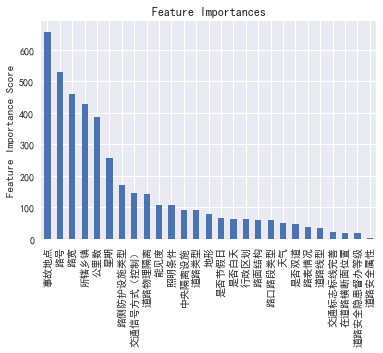

In [24]:
def modelfit(alg, dtrain, dLabel,useTrainCV=True, cv_folds=5, early_stopping_rounds=50): 
    global feat_imp
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain.values, label=dLabel.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False，多分类metrics使用merror
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain,dLabel,eval_metric='merror')    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        



    print ("\nModel Report")
    print ("Accuracy on trainSet : %.4g" % metrics.accuracy_score(dLabel.values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

    cvresult = pd.DataFrame(cvresult)
    print("Accuracy on cv set : %.4g" % (1-cvresult.iloc[-1][0]))
    print('test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:')
    print(cvresult.iloc[-1][:])#
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

    return alg
    
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    colsample_bytree=0.75,subsample=0.65,reg_alpha=0.05,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, data_roadGrade_withoutJianyi_toNum[[x for x in data_roadGrade_withoutJianyi_toNum.columns if x not in ['事故类型']]],\
           data_roadGrade_withoutJianyi_toNum['事故类型'])